# Signal processing

In [42]:
import neo
import numpy as np
import quantities as pq
from elephant.signal_processing import *
from elephant.datasets import download_datasets
import matplotlib.pyplot as plt

In [43]:
# TODO: this is just for development and using local data, delete before merging
! export ELEPHANT_DATA_LOCATION=~/gin/elephant-data/

In [44]:
# TODO: this is just for development and using local data, delete before merging
from pathlib import Path
filepath = Path('~/gin/elephant-data/tutorials/tutorial_signal_processing/data/i140703-001_single_trial.nix').expanduser()

# Download data
# repo_path='tutorials/tutorial_signal_processing/data/i140703-001_single_trial.nix'
# filepath=download_datasets(repo_path)


In [45]:
with neo.NixIO(f"{filepath}", 'ro') as file:
    block = file.read_block()

signals = block.segments[0].analogsignals[0]

## z-scoring

In [46]:
signal = signals[:,1]

z_scored_signal = zscore(signal, inplace=False)

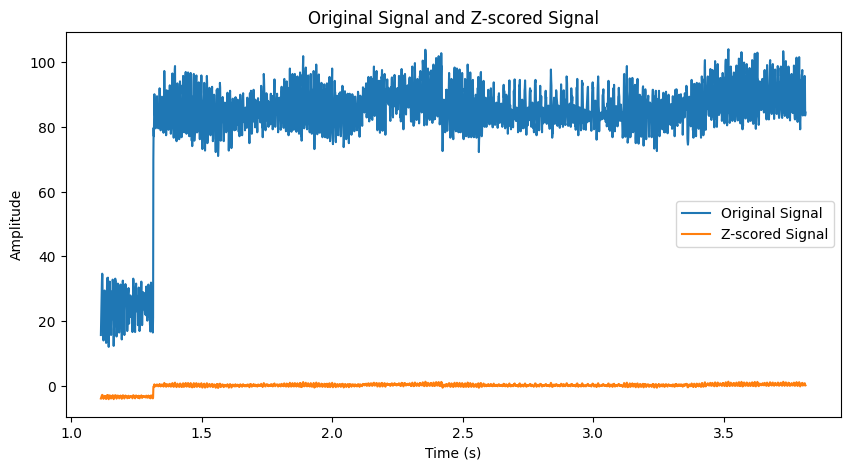

In [47]:
# Plot the original signal
plt.figure(figsize=(10, 5))
plt.plot(signal.times, signal, label='Original Signal')

# Plot the z-scored signal
plt.plot(z_scored_signal.times, z_scored_signal, label='Z-scored Signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal and Z-scored Signal')
plt.legend()

# Show the plot
plt.show()

## cross-correlation

In [48]:
# Define the signal
signal = signals

# Compute cross-correlation
rho = cross_correlation_function(signal, [0, 1], n_lags=150)
env = cross_correlation_function(signal, [0, 1], n_lags=150, hilbert_envelope=True)

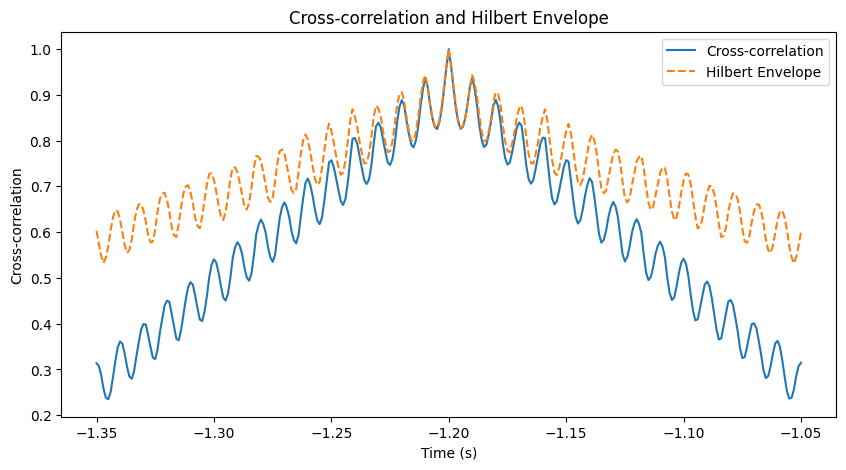

In [49]:
# Plot the cross-correlation and its envelope
plt.figure(figsize=(10, 5))
plt.plot(rho.times, rho, label='Cross-correlation')
plt.plot(env.times, env, label='Hilbert Envelope', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation and Hilbert Envelope')
plt.legend()

plt.show()

## butter

In [73]:
signal = signals[:,1]
filtered_signal = butter(signal,lowpass_frequency=50*pq.Hz, highpass_frequency=250.0 * pq.Hz)

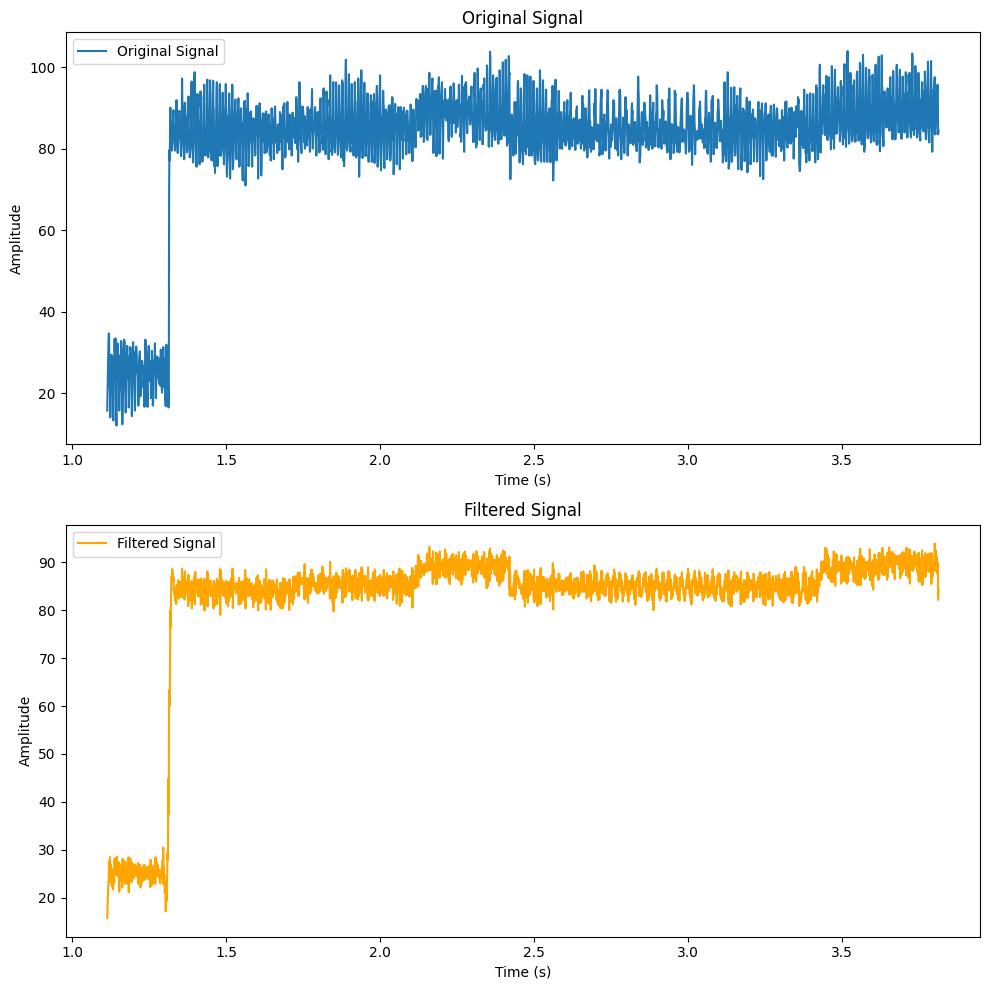

In [74]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the original signal
axs[0].plot(signal.times, signal, label='Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')
axs[0].legend()

# Plot the filtered signal
axs[1].plot(filtered_signal.times, filtered_signal, label='Filtered Signal', color='orange')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Filtered Signal')
axs[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()